In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('titanic_train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head(2)

,male
0,1
1,0


In [10]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head(2)

,Q,S
0,0,1
1,0,0


<AxesSubplot:>

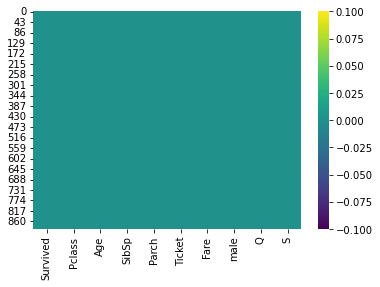

In [75]:
sns.heatmap(df.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

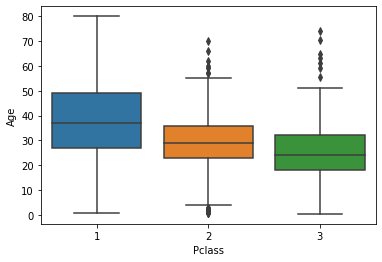

In [20]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [28]:
dum=df.groupby(by='Pclass').mean()['Age']
dum

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [54]:
def aveage(item):
    Age=item[0]
    Pclass=item[1]
    if pd.isnull(Age):
        if Pclass==1: return 38.23
        elif Pclass==2: return 29.87
        else: return 25.14
    else: return Age        

In [55]:
age=df[['Age','Pclass']].apply(aveage,axis=1)
age.head(2)
df['Age']=age

In [62]:
df.drop('Cabin',axis=1)

In [66]:
df=pd.concat([df,sex,embark],axis=1)

In [70]:
df.drop(['PassengerId','Sex','Embarked','Name'],axis=1,inplace=True)

In [73]:
dfp=df.drop(['Ticket'],axis=1)

In [78]:
p_class=pd.get_dummies(df['Pclass'],drop_first=1)

,2,3
0,0,1
1,0,0


In [84]:
dfp2=pd.concat([dfp,p_class],axis=1)

In [85]:
dfp2.drop('Pclass',axis=1,inplace=True)

In [90]:
y=dfp['Survived']
X=dfp.drop('Survived',axis=1)
X2=dfp2.drop('Survived',axis=1)

In [96]:
from sklearn.model_selection import train_test_split
X_te,X_tr,y_te,y_tr = train_test_split(X,y,test_size=0.3,random_state=101)
X2_te,X2_tr,y2_te,y2_tr = train_test_split(X2,y,test_size=0.3,random_state=101)

In [102]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmod=LogisticRegression(max_iter=300)

In [110]:
logmod.fit(X_tr,y_tr)

LogisticRegression(max_iter=300)

In [111]:
predictions=logmod.predict(X_te)

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_te,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       395
           1       0.75      0.75      0.75       228

    accuracy                           0.82       623
   macro avg       0.80      0.80      0.80       623
weighted avg       0.82      0.82      0.82       623



In [114]:
logmod2=LogisticRegression(max_iter=300)

In [115]:
logmod2.fit(X2_tr,y2_tr)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=300)

In [118]:
predictions2=logmod2.predict(X2_te)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [119]:
print(classification_report(y2_te,predictions2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       395
           1       0.76      0.73      0.75       228

    accuracy                           0.82       623
   macro avg       0.80      0.80      0.80       623
weighted avg       0.82      0.82      0.82       623



In [120]:
logmod.coef_

array([[-1.15112761e+00, -4.27985746e-02, -3.80315730e-01,
        -5.92874360e-02,  7.39883025e-05, -2.39939951e+00,
        -9.49166675e-02, -2.63214129e-01]])

In [122]:
logmod2.coef_

array([[-3.74816440e-02, -3.72001968e-01, -8.32690740e-02,
         1.83942115e-03, -2.35627677e+00, -1.71430557e-01,
        -3.02673847e-01, -6.90271843e-01, -1.85035052e+00]])

In [123]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_te,predictions)

array([[337,  58],
       [ 57, 171]], dtype=int64)

In [126]:
confusion_matrix(y2_te,predictions2)

array([[342,  53],
       [ 61, 167]], dtype=int64)

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

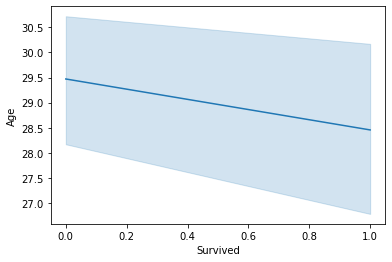

In [130]:
sns.lineplot(y_te,X['Age'])